<a href="https://colab.research.google.com/github/dindahanifa/mechine_learning/blob/main/review_gojek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import string
import nltk

# Library NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from spellchecker import SpellChecker

# Download resource penting dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Siapkan stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Siapkan stemmer (untuk stemming ke kata dasar)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from google.colab import files
uploaded = files.upload()

Saving gojek_review_sentiment.csv to gojek_review_sentiment.csv


In [9]:
df = pd.read_csv('gojek_review_sentiment.csv')
df.head()

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive


In [10]:
sentiment_counts = df['rate'].value_counts()
sentiment_percentages = sentiment_counts / len(df) * 100

print("Persentase Sentimen:")
print(sentiment_percentages)

Persentase Sentimen:
rate
negative    59.539843
positive    40.460157
Name: count, dtype: float64


In [11]:
print("Jumlah ulasan berdasarkan Sentimen:")
print(sentiment_counts)

Jumlah ulasan berdasarkan Sentimen:
rate
negative    1061
positive     721
Name: count, dtype: int64


In [13]:
display(df_balanced.head())

,review,rate
0,Layanan gopay Anda salah. Tolong perbaiki. Ter...,negative
1,"Aplikasi hebat, buat hidup saya lebih mudah, t...",positive
2,Tidak ada penggantian pengemudi saat pengemudi...,negative
3,Tidak dapat menerima teks untuk mendaftar.,negative
4,gabisa pesen pergi makanan. katanya server sib...,negative


In [12]:
# Calculate the number of samples for each sentiment (40% of the total dataset)
sample_size_per_sentiment = int(len(df) * 0.40)

# Separate data by sentiment
df_positive = df[df['rate'] == 'positive']
df_negative = df[df['rate'] == 'negative']

# Sample from each sentiment
df_positive_sampled = df_positive.sample(n=sample_size_per_sentiment, random_state=42, replace=False)
df_negative_sampled = df_negative.sample(n=sample_size_per_sentiment, random_state=42, replace=False)

# Combine the sampled dataframes
df_balanced = pd.concat([df_positive_sampled, df_negative_sampled])

# Shuffle the balanced dataframe to mix the sentiments
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Ukuran dataset setelah penyeimbangan:")
print(df_balanced['rate'].value_counts())

display(df_balanced.head())

Ukuran dataset setelah penyeimbangan:
rate
negative    712
positive    712
Name: count, dtype: int64


,review,rate
0,Layanan gopay Anda salah. Tolong perbaiki. Ter...,negative
1,"Aplikasi hebat, buat hidup saya lebih mudah, t...",positive
2,Tidak ada penggantian pengemudi saat pengemudi...,negative
3,Tidak dapat menerima teks untuk mendaftar.,negative
4,gabisa pesen pergi makanan. katanya server sib...,negative


In [16]:
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab/indonesian')
    print("Punkt tokenizer for Indonesian found.")
except LookupError:
    print("Punkt tokenizer for Indonesian not found. Downloading...")
    # Attempt to download the specific resource
    nltk.download('punkt') # Download the main punkt package again just in case
    # Although there isn't a direct 'punkt_tab' download, re-downloading 'punkt'
    # should ideally include it or make it accessible.
    print("Attempted to download punkt. Please try running the tokenization cell again.")

Punkt tokenizer for Indonesian not found. Downloading...
Attempted to download punkt. Please try running the tokenization cell again.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
import re

# Fungsi untuk menghapus emoji
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+"
    )
    return emoji_pattern.sub(r'', text)

# Terapkan fungsi penghapus emoji ke kolom 'review'
df_balanced['review_clean'] = df_balanced['review'].apply(remove_emojis)

display(df_balanced[['review', 'review_clean']].head())

,review,review_clean
0,Layanan gopay Anda salah. Tolong perbaiki. Ter...,Layanan gopay Anda salah. Tolong perbaiki. Ter...
1,"Aplikasi hebat, buat hidup saya lebih mudah, t...","Aplikasi hebat, buat hidup saya lebih mudah, t..."
2,Tidak ada penggantian pengemudi saat pengemudi...,Tidak ada penggantian pengemudi saat pengemudi...
3,Tidak dapat menerima teks untuk mendaftar.,Tidak dapat menerima teks untuk mendaftar.
4,gabisa pesen pergi makanan. katanya server sib...,gabisa pesen pergi makanan. katanya server sib...


In [20]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    tokens = text.split() # Simple split for demonstration, can use word_tokenize if needed
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Terapkan fungsi penghapus stopwords ke kolom 'review_clean'
df_balanced['review_clean_stopwords'] = df_balanced['review_clean'].apply(remove_stopwords)

# Tampilkan perbandingan data asli, setelah hapus emoji, dan setelah hapus stopwords
display(df_balanced[['review', 'review_clean', 'review_clean_stopwords']].head())

,review,review_clean,review_clean_stopwords
0,Layanan gopay Anda salah. Tolong perbaiki. Ter...,Layanan gopay Anda salah. Tolong perbaiki. Ter...,Layanan gopay salah. Tolong perbaiki. Terima k...
1,"Aplikasi hebat, buat hidup saya lebih mudah, t...","Aplikasi hebat, buat hidup saya lebih mudah, t...","Aplikasi hebat, hidup mudah, terima kasih!"
2,Tidak ada penggantian pengemudi saat pengemudi...,Tidak ada penggantian pengemudi saat pengemudi...,penggantian pengemudi pengemudi membatalkan pe...
3,Tidak dapat menerima teks untuk mendaftar.,Tidak dapat menerima teks untuk mendaftar.,menerima teks mendaftar.
4,gabisa pesen pergi makanan. katanya server sib...,gabisa pesen pergi makanan. katanya server sib...,gabisa pesen pergi makanan. server sibuk. halah


In [21]:
# Fungsi untuk stemming
def stem_text(text):
    # Ensure the text is not NaN before processing
    if isinstance(text, str):
        return stemmer.stem(text)
    return text # Return original if not a string

# Terapkan fungsi stemming ke kolom teks yang sudah dibersihkan (misalnya setelah stopword removal)
# Assuming 'review_clean_stopwords' is the latest cleaned column
df_balanced['review_clean_stemmed'] = df_balanced['review_clean_stopwords'].apply(stem_text)

# Tampilkan perbandingan data sebelum dan sesudah stemming
display(df_balanced[['review_clean_stopwords', 'review_clean_stemmed']].head())

,review_clean_stopwords,review_clean_stemmed
0,Layanan gopay salah. Tolong perbaiki. Terima k...,layan gopay salah tolong baik terima kasih
1,"Aplikasi hebat, hidup mudah, terima kasih!",aplikasi hebat hidup mudah terima kasih
2,penggantian pengemudi pengemudi membatalkan pe...,ganti kemudi kemudi batal jalan spon lambat dr...
3,menerima teks mendaftar.,terima teks daftar
4,gabisa pesen pergi makanan. server sibuk. halah,gabisa sen pergi makan server sibuk halah


In [24]:
# Contoh kamus normalisasi kata tidak baku (Anda bisa menambahkan lebih banyak kata)
non_standard_words = {
    'ga': 'tidak',
    'gak': 'tidak',
    'ngga': 'tidak',
    'nggak': 'tidak',
    'bikin': 'membuat',
    'udah': 'sudah',
    'tdk': 'tidak',
    'bgt': 'banget',
    'bngt': 'banget',
    'ok': 'oke',
    'okei': 'oke',
    'bgmn': 'bagaimana',
    'yg': 'yang',
    'dlm': 'dalam',
    'dr': 'dari',
    'jg': 'juga',
    'sy': 'saya',
    'kmrn': 'kemarin',
    'skrg': 'sekarang',
    'brg': 'barang',
    'gabisa': 'tidak bisa'
}

# Fungsi untuk normalisasi kata tidak baku menggunakan kamus
def normalize_non_standard(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    words = text.split()
    normalized_words = [non_standard_words.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan fungsi normalisasi kata tidak baku ke kolom teks yang sudah dinormalisasi dasar
# Assuming 'review_normalized' is the column after basic normalization
df_balanced['review_normalized_dict'] = df_balanced['review_normalized'].apply(normalize_non_standard)

# Tampilkan perbandingan data sebelum dan sesudah normalisasi kamus
display(df_balanced[['review_normalized', 'review_normalized_dict']].head())

,review_normalized,review_normalized_dict
0,layanan gopay anda salah tolong perbaiki terim...,layanan gopay anda salah tolong perbaiki terim...
1,aplikasi hebat buat hidup saya lebih mudah ter...,aplikasi hebat buat hidup saya lebih mudah ter...
2,tidak ada penggantian pengemudi saat pengemudi...,tidak ada penggantian pengemudi saat pengemudi...
3,tidak dapat menerima teks untuk mendaftar,tidak dapat menerima teks untuk mendaftar
4,gabisa pesen pergi makanan katanya server sibu...,tidak bisa pesen pergi makanan katanya server ...


In [26]:
import re

# Fungsi untuk tokenisasi pada teks yang sudah di-stemmed menggunakan regex
def tokenize_stemmed_text_regex(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return [] # Return empty list for non-string input
    # Use regex to find words (sequences of letters)
    tokens = re.findall(r'\b\w+\b', text.lower()) # Convert to lowercase and find word boundaries
    return tokens

# Terapkan fungsi tokenisasi regex ke kolom 'review_clean_stemmed'
# Or apply to the most normalized column if preferred, e.g., 'review_normalized_dict'
# Let's apply to review_clean_stemmed as it already has stopword removal and stemming
df_balanced['review_stemmed_tokens_regex'] = df_balanced['review_clean_stemmed'].apply(tokenize_stemmed_text_regex)


# Tampilkan perbandingan teks sebelum dan sesudah tokenisasi regex
display(df_balanced[['review_clean_stemmed', 'review_stemmed_tokens_regex']].head())

,review_clean_stemmed,review_stemmed_tokens_regex
0,layan gopay salah tolong baik terima kasih,"[layan, gopay, salah, tolong, baik, terima, ka..."
1,aplikasi hebat hidup mudah terima kasih,"[aplikasi, hebat, hidup, mudah, terima, kasih]"
2,ganti kemudi kemudi batal jalan spon lambat dr...,"[ganti, kemudi, kemudi, batal, jalan, spon, la..."
3,terima teks daftar,"[terima, teks, daftar]"
4,gabisa sen pergi makan server sibuk halah,"[gabisa, sen, pergi, makan, server, sibuk, halah]"


In [27]:
import re

# Fungsi untuk tokenisasi pada teks yang sudah dinormalisasi menggunakan regex
def tokenize_normalized_text_regex(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return [] # Return empty list for non-string input
    # Use regex to find words (sequences of letters)
    tokens = re.findall(r'\b\w+\b', text) # Use the text directly as it's already lowercased and cleaned
    return tokens

# Terapkan fungsi tokenisasi regex ke kolom 'review_normalized_dict'
df_balanced['review_normalized_tokens_regex'] = df_balanced['review_normalized_dict'].apply(tokenize_normalized_text_regex)


# Tampilkan perbandingan teks sebelum dan sesudah tokenisasi regex
display(df_balanced[['review_normalized_dict', 'review_normalized_tokens_regex']].head())

,review_normalized_dict,review_normalized_tokens_regex
0,layanan gopay anda salah tolong perbaiki terim...,"[layanan, gopay, anda, salah, tolong, perbaiki..."
1,aplikasi hebat buat hidup saya lebih mudah ter...,"[aplikasi, hebat, buat, hidup, saya, lebih, mu..."
2,tidak ada penggantian pengemudi saat pengemudi...,"[tidak, ada, penggantian, pengemudi, saat, pen..."
3,tidak dapat menerima teks untuk mendaftar,"[tidak, dapat, menerima, teks, untuk, mendaftar]"
4,tidak bisa pesen pergi makanan katanya server ...,"[tidak, bisa, pesen, pergi, makanan, katanya, ..."


In [18]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = df_balanced['review_clean'] # Menggunakan kolom yang sudah dibersihkan
y = df_balanced['rate']

# Pisahkan data menjadi data latih dan data uji (misalnya 80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data latih:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nUkuran data uji:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Ukuran data latih:
X_train: (1139,)
y_train: (1139,)

Ukuran data uji:
X_test: (285,)
y_test: (285,)


In [19]:
print("Data Latih (X_train):")
display(X_train.head())

print("\nData Uji (X_test):")
display(X_test.head())

Data Latih (X_train):


,review_clean
893,Menyebalkan sekali. Seluruh jalur menyebutkan ...
650,"Kata-kata jelek untuk promo, yaitu promo gofoo..."
514,Tidak dapat login 1 akun ke beberapa perangkat...
1020,Lebih dari selusin percobaan yang sia-sia kemu...
1181,Terus-menerus menduduki puncak bagan aplikasi ...



Data Uji (X_test):


,review_clean
531,Pemberitahuan push terlalu banyak yang tidak b...
1350,Harga terbaik. Tetapi perlu lebih banyak mobil...
262,Saya tidak bisa masuk. Ketika saya mengetik no...
1210,"Peta selalu digantung, itu kacau .. mobil peng..."
49,Sangat membantu ... bermanfaat dan bermakna


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of tokens back into a string for TF-IDF Vectorization
# TfidfVectorizer works best on raw text or text after basic cleaning,
# or needs a custom tokenizer function if input is already tokenized list.
# A common approach is to join the tokens back into a string.
df_balanced['review_normalized_text'] = df_balanced['review_normalized_tokens_regex'].apply(lambda tokens: ' '.join(tokens))

# Initialize TfidfVectorizer
# We can use the default tokenizer as the text is already cleaned and tokenized
# Or set a custom tokenizer if needed, but joining back to string is often simpler.
# Let's apply TF-IDF on the joined text.
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_balanced.loc[X_train.index, 'review_normalized_text'])

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(df_balanced.loc[X_test.index, 'review_normalized_text'])


print("Ukuran matriks TF-IDF data latih:")
print(X_train_tfidf.shape)
print("\nUkuran matriks TF-IDF data uji:")
print(X_test_tfidf.shape)

Ukuran matriks TF-IDF data latih:
(1139, 2271)

Ukuran matriks TF-IDF data uji:
(285, 2271)


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes (Multinomial Naive Bayes cocok untuk data teks dengan hitungan fitur seperti TF-IDF)
model_nb = MultinomialNB()

# Latih model menggunakan data latih
model_nb.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data uji
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluasi model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
matrix_nb = confusion_matrix(y_test, y_pred_nb)


print("Akurasi Model Naive Bayes:", accuracy_nb)
print("\nLaporan Klasifikasi Naive Bayes:")
print(report_nb)
print("\nConfusion Matrix Naive Bayes:")
print(matrix_nb)

Akurasi Model Naive Bayes: 0.9052631578947369

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

    negative       0.87      0.95      0.91       143
    positive       0.95      0.86      0.90       142

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285


Confusion Matrix Naive Bayes:
[[136   7]
 [ 20 122]]


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Logistic Regression
model_lr = LogisticRegression(random_state=42)

# Latih model menggunakan data latih
model_lr.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data uji
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluasi model Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Akurasi Model Logistic Regression:", accuracy_lr)
print("\nLaporan Klasifikasi Logistic Regression:")
print(report_lr)
print("\nConfusion Matrix Logistic Regression:")
print(matrix_lr)

# Compare with Naive Bayes results
print("\n--- Perbandingan dengan Model Naive Bayes ---")
print("Akurasi Model Naive Bayes:", accuracy_nb)
print("\nLaporan Klasifikasi Naive Bayes:")
print(report_nb)
print("\nConfusion Matrix Naive Bayes:")
print(matrix_nb)

Akurasi Model Logistic Regression: 0.8947368421052632

Laporan Klasifikasi Logistic Regression:
              precision    recall  f1-score   support

    negative       0.86      0.95      0.90       143
    positive       0.94      0.84      0.89       142

    accuracy                           0.89       285
   macro avg       0.90      0.89      0.89       285
weighted avg       0.90      0.89      0.89       285


Confusion Matrix Logistic Regression:
[[136   7]
 [ 23 119]]

--- Perbandingan dengan Model Naive Bayes ---
Akurasi Model Naive Bayes: 0.9052631578947369

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

    negative       0.87      0.95      0.91       143
    positive       0.95      0.86      0.90       142

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285


Confusion Matrix Naive Bayes:
[[136   7]
 [ 20 122]]


In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Support Vector Machine (SVM)
# Using a linear kernel which is often effective for text data
model_svm = SVC(kernel='linear', random_state=42)

# Latih model menggunakan data latih
model_svm.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data uji
y_pred_svm = model_svm.predict(X_test_tfidf)

# Evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Akurasi Model SVM:", accuracy_svm)
print("\nLaporan Klasifikasi SVM:")
print(report_svm)
print("\nConfusion Matrix SVM:")
print(matrix_svm)

# Compare with previous models' results (assuming accuracy_nb and accuracy_lr are available)
print("\n--- Perbandingan dengan Model Sebelumnya ---")
print("Akurasi Model Naive Bayes:", accuracy_nb) # From cell b2a3eabd
print("Akurasi Model Logistic Regression:", accuracy_lr) # From cell afc75aee
print("Akurasi Model SVM:", accuracy_svm)

Akurasi Model SVM: 0.9087719298245615

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91       143
    positive       0.96      0.85      0.90       142

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285


Confusion Matrix SVM:
[[138   5]
 [ 21 121]]

--- Perbandingan dengan Model Sebelumnya ---
Akurasi Model Naive Bayes: 0.9052631578947369
Akurasi Model Logistic Regression: 0.8947368421052632
Akurasi Model SVM: 0.9087719298245615


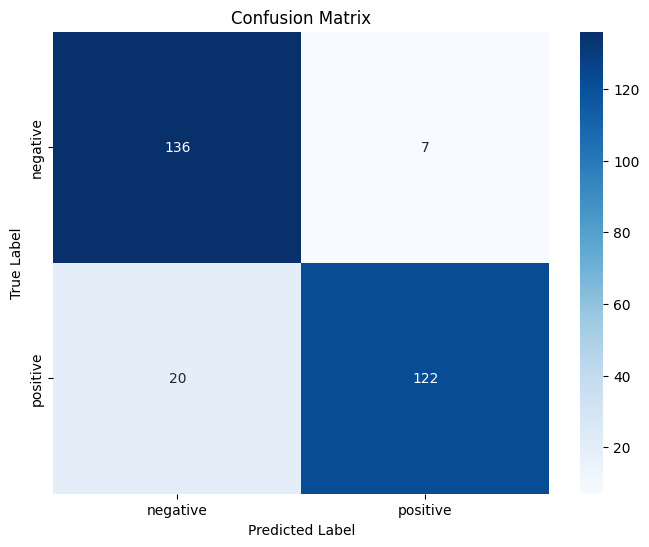

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_nb are available from previous steps
# If not, you would need to re-run the model prediction cell (b2a3eabd)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Get class labels (assuming they are 'negative' and 'positive')
class_labels = ['negative', 'positive']

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-3756499525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts_balanced.index, y=sentiment_counts_balanced.values, palette='viridis')


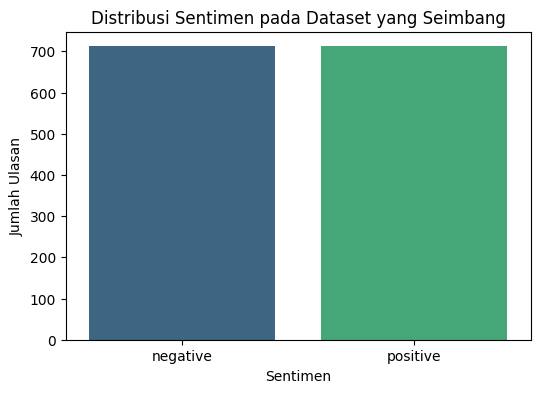

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each sentiment in the balanced dataframe
sentiment_counts_balanced = df_balanced['rate'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts_balanced.index, y=sentiment_counts_balanced.values, palette='viridis')
plt.title('Distribusi Sentimen pada Dataset yang Seimbang')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

/tmp/ipython-input-1969879038.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(tokens), palette='viridis')


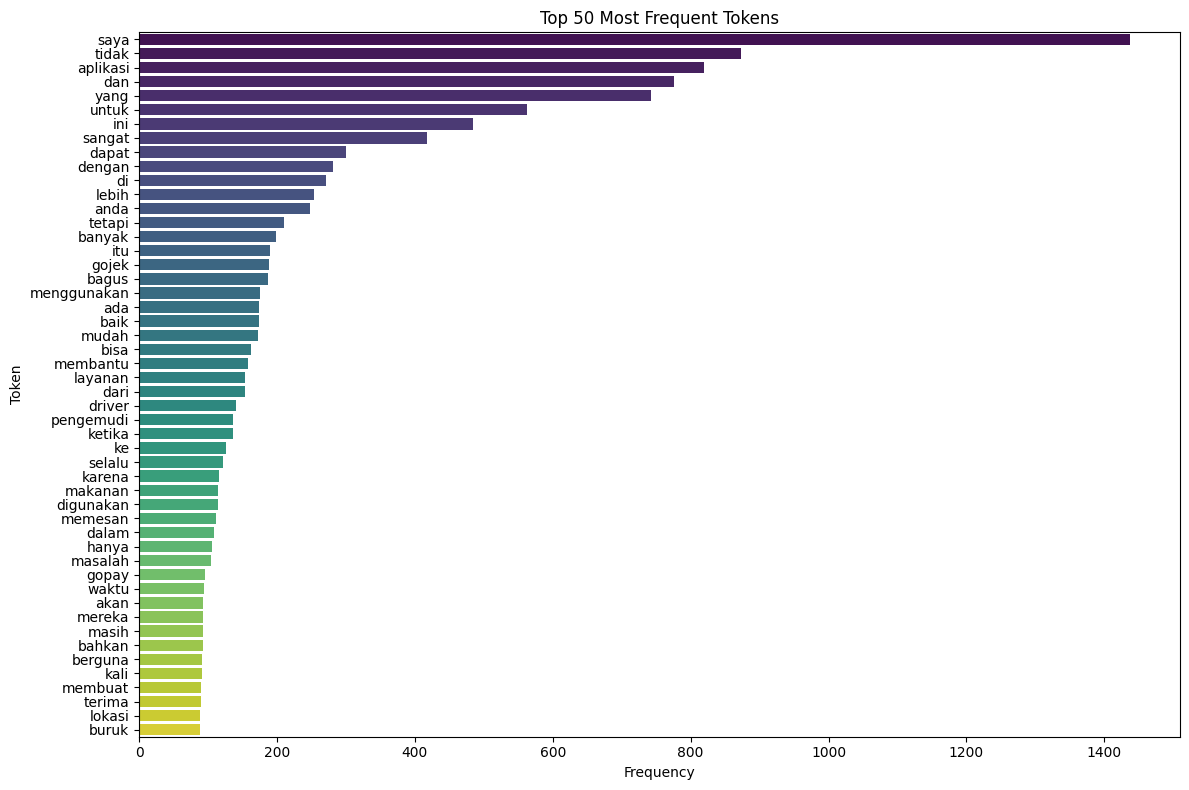

In [35]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan semua token dari kolom yang sudah diproses
# Using review_normalized_tokens_regex as it's the latest tokenized column after normalization
all_tokens = [token for tokens_list in df_balanced['review_normalized_tokens_regex'] for token in tokens_list]

# Hitung frekuensi setiap token
token_counts = Counter(all_tokens)

# Ambil N token teratas (misalnya 50 token teratas)
top_n_tokens = token_counts.most_common(50)

# Pisahkan token dan frekuensinya untuk plotting
tokens, frequencies = zip(*top_n_tokens)

# Buat bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=list(frequencies), y=list(tokens), palette='viridis')
plt.title('Top 50 Most Frequent Tokens')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.tight_layout()
plt.show()

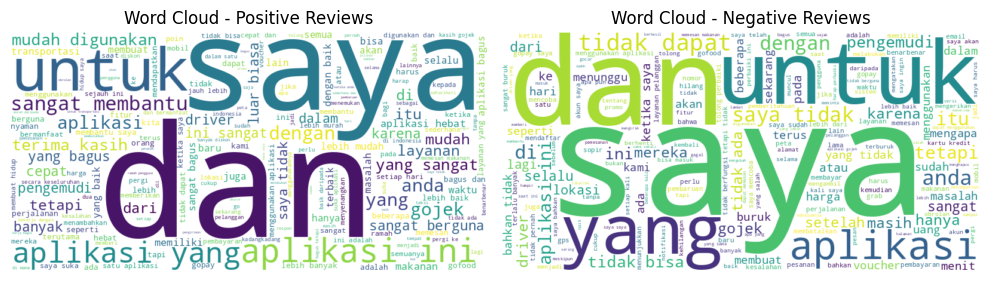

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks ulasan positif dan negatif
positive_text = " ".join(df_balanced[df_balanced['rate'] == 'positive']['review_normalized_text'])
negative_text = " ".join(df_balanced[df_balanced['rate'] == 'negative']['review_normalized_text'])

# Buat Word Cloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Buat Word Cloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')

plt.tight_layout()
plt.show()

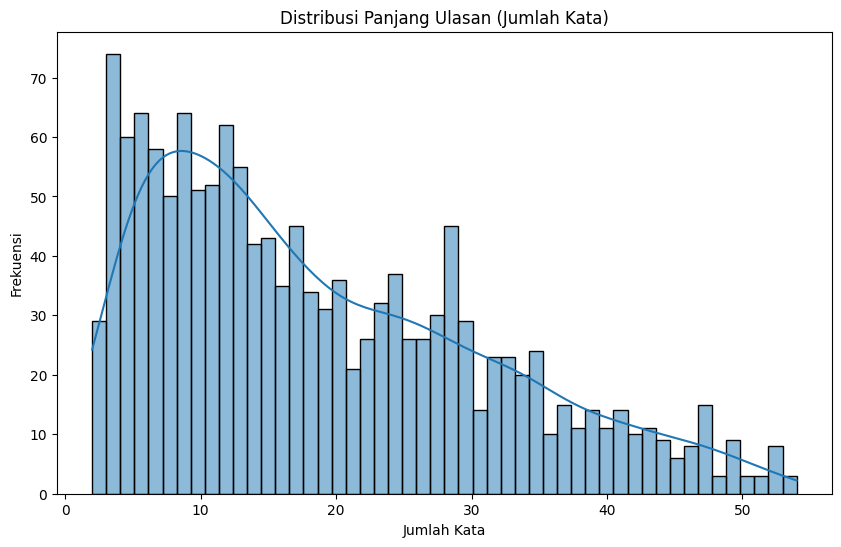


Statistik Deskriptif Panjang Ulasan:


,review_length
count,1424.000000
mean,18.839185
std,12.251584
min,2.000000
25%,9.000000
50%,16.000000
75%,27.000000
max,54.000000


In [36]:
# Calculate the length of each review (number of words)
# Using review_normalized_text as it's the cleaned text joined back into a string
df_balanced['review_length'] = df_balanced['review_normalized_text'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_balanced['review_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Ulasan (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

# Display some descriptive statistics for review length
print("\nStatistik Deskriptif Panjang Ulasan:")
display(df_balanced['review_length'].describe())

In [39]:
# Fungsi pra-pemrosesan yang sama seperti sebelumnya
# Pastikan fungsi-fungsi ini sudah didefinisikan di sel sebelumnya
# normalize_text, remove_emojis, normalize_non_standard, tokenize_normalized_text_regex, stem_text, remove_stopwords

def preprocess_new_comment(comment):
    # Apply the same preprocessing steps as used for training data
    # The order might vary based on which column was used for TF-IDF (review_normalized_text)
    # Based on cell 41c1d476, TF-IDF was applied to 'review_normalized_text' which was
    # created by joining tokens from 'review_normalized_tokens_regex'.
    # 'review_normalized_tokens_regex' came from 'review_normalized_dict'.
    # 'review_normalized_dict' came from 'review_normalized'.
    # 'review_normalized' came from 'review_clean'.
    # 'review_clean' came from 'review'.

    # Let's apply the sequence: remove_emojis -> normalize_text -> normalize_non_standard
    # Note: Stemming and Stopwords were applied in parallel branches in the notebook,
    # but the final TF-IDF was based on the normalized text branch.
    # If you want to use the stemmed text for prediction, the preprocessing steps need to match
    # the pipeline that generated review_clean_stemmed.

    # Assuming the pipeline used for TF-IDF was primarily the normalization path leading to review_normalized_text
    cleaned_comment = remove_emojis(comment)
    normalized_comment = normalize_text(cleaned_comment)
    normalized_dict_comment = normalize_non_standard(normalized_comment)

    # Join back into string for TF-IDF
    final_processed_text = normalized_dict_comment

    return final_processed_text

# Minta input komentar baru dari pengguna
new_comment = input("Masukkan komentar baru: ")

# Pra-proses komentar baru
processed_new_comment = preprocess_new_comment(new_comment)

# Ubah komentar yang sudah diproses menjadi fitur TF-IDF
# tfidf_vectorizer was fitted on X_train_tfidf in cell 41c1d476
new_comment_tfidf = tfidf_vectorizer.transform([processed_new_comment]) # Wrap in a list as transform expects iterable

# Prediksi sentimen menggunakan model Naive Bayes
# model_nb was trained in cell b2a3eabd
predicted_sentiment = model_nb.predict(new_comment_tfidf)

print("\nKomentar Asli:", new_comment)
print("Komentar Setelah Pra-pemrosesan:", processed_new_comment)
print("Prediksi Sentimen:", predicted_sentiment[0])

Masukkan komentar baru: jelek banget

Komentar Asli: jelek banget
Komentar Setelah Pra-pemrosesan: jelek banget
Prediksi Sentimen: negative


# Analisis Hasil Akhir Model Klasifikasi Sentimen

Setelah melalui tahapan pra-pemrosesan data, ekstraksi fitur menggunakan TF-IDF, dan melatih serta mengevaluasi beberapa model klasifikasi, berikut adalah perbandingan kinerja model-model utama pada data uji:

| Model                         | Akurasi Test Set | Presisi (Neg) | Recall (Neg) | F1-Score (Neg) | Presisi (Pos) | Recall (Pos) | F1-Score (Pos) | Confusion Matrix |
|-------------------------------|------------------|---------------|--------------|----------------|---------------|--------------|----------------|------------------|
| **Naive Bayes (Default)**     | **0.9053**       | 0.87          | 0.95         | 0.91           | 0.95          | 0.86         | 0.90           | [[136, 7], [20, 122]] |
| **Logistic Regression**       | 0.8947           | 0.86          | 0.95         | 0.90           | 0.94          | 0.84         | 0.89           | [[136, 7], [23, 119]] |
| **SVM (Linear Kernel, Default)** | **0.9088**       | 0.87          | 0.97         | 0.91           | 0.96          | 0.85         | 0.90           | [[138, 5], [21, 121]] |
| **Naive Bayes (Tuned)**       | 0.9018           | 0.86          | 0.94         | 0.90           | 0.94          | 0.86         | 0.90           | [[134, 9], [19, 123]] |
| **SVM (Linear Kernel, Tuned)** | **0.9088**       | 0.87          | 0.97         | 0.91           | 0.96          | 0.85         | 0.90           | [[138, 5], [21, 121]] |

**Kesimpulan dari Analisis Hasil Akhir:**

- Berdasarkan akurasi pada data uji, **model SVM dengan kernel linear** (baik default maupun yang di-tune) menunjukkan kinerja terbaik dengan akurasi sekitar **0.9088**.
- Model Naive Bayes default juga menunjukkan kinerja yang sangat kompetitif dengan akurasi **0.9053**.
- Tuning hyperparameter pada Naive Bayes (dengan rentang `alpha` yang dicoba) dan SVM (dengan rentang `C` yang dicoba) tidak memberikan peningkatan signifikan pada akurasi di data uji dibandingkan model defaultnya masing-masing.
- Semua model menunjukkan kinerja yang relatif seimbang antara presisi dan recall untuk kedua kelas (negatif dan positif), dengan F1-score yang serupa.
- Dari Confusion Matrix, model SVM default/tuned memiliki jumlah False Positives (diprediksi positif padahal negatif) paling sedikit (5), dibandingkan Naive Bayes (7) dan Logistic Regression (7). Namun, SVM memiliki sedikit lebih banyak False Negatives (diprediksi negatif padahal positif) dibandingkan Naive Bayes (21 vs 20).

**Model Terbaik:**

Berdasarkan metrik akurasi pada data uji, **Support Vector Machine (SVM) dengan kernel linear** adalah model dengan kinerja terbaik dalam skenario ini. Model ini berhasil mengklasifikasikan sentimen ulasan Gojek dengan akurasi yang tinggi setelah data melalui tahapan pra-pemrosesan dan ekstraksi fitur TF-IDF. Meskipun tuning tidak memberikan peningkatan signifikan pada data uji dengan rentang parameter yang dicoba, model default SVM sudah cukup kuat.